In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
results = pd.read_csv("res-proba-vit.csv", index_col = 0)
results.shape

(2828, 7)

In [14]:
results.head()

,file-name,original-pred,algorithm,iteration,modified-pred-proba,alternative-pred,modified-original-proba
0,img_6295,8,simec,700,2.315235,8,2.315235
1,img_6295,8,simec,80,2.585779,8,2.585779
2,img_6295,8,simec,320,2.515639,8,2.515639
3,img_6295,8,simec,420,2.466339,8,2.466339
4,img_6295,8,simec,910,2.424673,8,2.424673


In [11]:
if "explore-token" in results.columns:
    alternative_token_ranks = results.groupby(["iteration", "file-name", "algorithm", "explore-token"]).agg(list)
    alternative_token_ranks['alternative-token-rank'] = alternative_token_ranks['alternative-token-proba'].apply(lambda L: 5 - np.argsort(L))
    alternative_token_ranks = alternative_token_ranks.explode(["alternative-token-rank", "alternative-token"]).set_index("alternative-token", append = True)['alternative-token-rank']
    results = pd.merge(results, alternative_token_ranks, how = "inner", left_on=["iteration", "file-name", "algorithm", "explore-token", "alternative-token"], right_index = True)

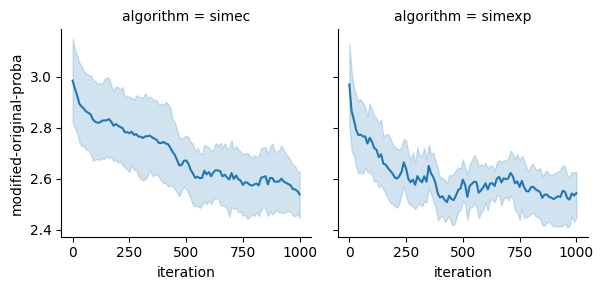

In [16]:
g = sns.FacetGrid(data = results, col = "algorithm", sharey=True)
y = "modified-pred-proba" if "explore-token" in results.columns else "modified-original-proba"
g.map(sns.lineplot, "iteration", y, errorbar = ("ci", 95))
g.add_legend()

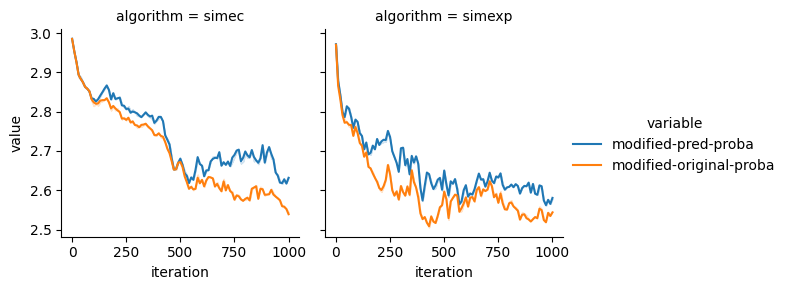

In [19]:
if "explore-token" in results.columns:
    f= sns.FacetGrid(data = results, col = "algorithm", hue = "alternative-token-rank", sharey=True)
    f.map(sns.lineplot, "iteration", "modified-pred-proba", errorbar = ("ci", 0))
    f.add_legend()
else:
    melted_df = pd.melt(results, id_vars=["iteration", "algorithm"], value_vars=["modified-pred-proba", "modified-original-proba"])
    f = sns.FacetGrid(data = melted_df, col="algorithm", hue = "variable", sharey = True)
    f.map(sns.lineplot, "iteration", "value", errorbar = ("ci", 0))
    f.add_legend()